In [2]:
!pip install easyocr opencv-python matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.2/978.2 kB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.6/300.6 kB 24.3 MB/s eta 0:00:00


In [62]:
import cv2
import easyocr
import matplotlib.pyplot as plt

In [63]:
# funcao para leitura da imagem
def mostrar_imagem(img, titulo="Imagem"):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 8))
    plt.imshow(img_rgb)
    plt.title(titulo)
    plt.axis('off')
    plt.show()

In [79]:
#funcao para reconhecer qual sera a acao que o carro vai realizar
def acao_carro(texto_detectado):
    texto_limpo = texto_detectado.upper().strip()

    # velocidade
    if texto_limpo == "80":
        return "COMANDO: Definir velocidade padrão para 80 km/h."

    if texto_limpo == "70":
        return "COMANDO: Definir velocidade padrão para 70 km/h."

    if texto_limpo == "60":
        return "COMANDO: Definir velocidade padrão para 60 km/h."

    if texto_limpo == "50":
        return "COMANDO: Definir velocidade padrão para 50 km/h."

    if texto_limpo == "40":
        return "COMANDO: Definir velocidade padrão para 40 km/h."

    if texto_limpo == "30":
        return "COMANDO: Definir velocidade padrão para 30 km/h."

    # aviso de radar
    if "FISCALIZA" in texto_limpo or "ELETRONICA" in texto_limpo:
        return "ALERTA: Radar detectado na rodovia."

    # placa pare
    if "PARE" in texto_limpo:
        return "COMANDO: Diminuir velocidade para parar o veículo"

    return "Placa com informação porém sem necessidade de tomada de decisão"

In [76]:
# leitura de placa
def ler_placa(caminho_imagem):
    img = cv2.imread(caminho_imagem)
    if img is None:
        print(f"Imagem não reconhecida -> {caminho_imagem}")
        return

    #tratamentos
    img_ampliada = cv2.resize(img, None, fx=2.0, fy=2.0, interpolation=cv2.INTER_CUBIC) #imagem ampliada
    img_cinza = cv2.cvtColor(img_ampliada, cv2.COLOR_BGR2GRAY) #cinza
    img_tratada = cv2.bilateralFilter(img_cinza, 11, 17, 17)#diminui ruidos e mantem bordas

    # easyocr
    reader = easyocr.Reader(['pt', 'en'], gpu=False)

    caracteres_permitidos = 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789/ '

    print("Lendo imagem com os tratamentos aplicados")
    resultados = reader.readtext(
        img_tratada,
        adjust_contrast=True,
        allowlist=caracteres_permitidos
    )

    print("\n -> Resultado da leitura da imagem <- ")
    for (bbox, texto, probabilidade) in resultados:

        # aqui o filtro pode ser 0.50 para ser menos rigoroso porem menos preciso
        # ou 0.80 para ter mais precisao
        if probabilidade >= 0.50:

            # tomada de decisao
            comando = acao_carro(texto)
            print(f"Texto: {texto} (Confiança: {probabilidade:.2f}) -> {comando}")

            # desenha retangulo e texto
            (tl, tr, br, bl) = bbox
            tl_int = (int(tl[0]), int(tl[1]))
            br_int = (int(br[0]), int(br[1]))
            cv2.rectangle(img_ampliada, tl_int, br_int, (0, 255, 0), 2)
            cv2.putText(img_ampliada, texto, (tl_int[0], tl_int[1] - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

        else:
            # demais textos da imagem, sem tomada de descisao
            print(f"[IGNORADO] Texto '{texto}' descartado (Confiança: {probabilidade:.2f})")

    mostrar_imagem(img_ampliada, "Placa Processada")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Lendo imagem com os tratamentos aplicados

 -> Resultado da leitura da imagem <- 
Texto: 60 (Confiança: 1.00) -> COMANDO: Definir velocidade padrão para 60 km/h.
Texto: km/h (Confiança: 0.97) -> Placa com informação porém sem necessidade de tomada de decisão
[IGNORADO] Texto 'FFISCALIZACAOI' descartado (Confiança: 0.48)
Texto: ELETRONICA (Confiança: 0.72) -> ALERTA: Radar detectado na rodovia.


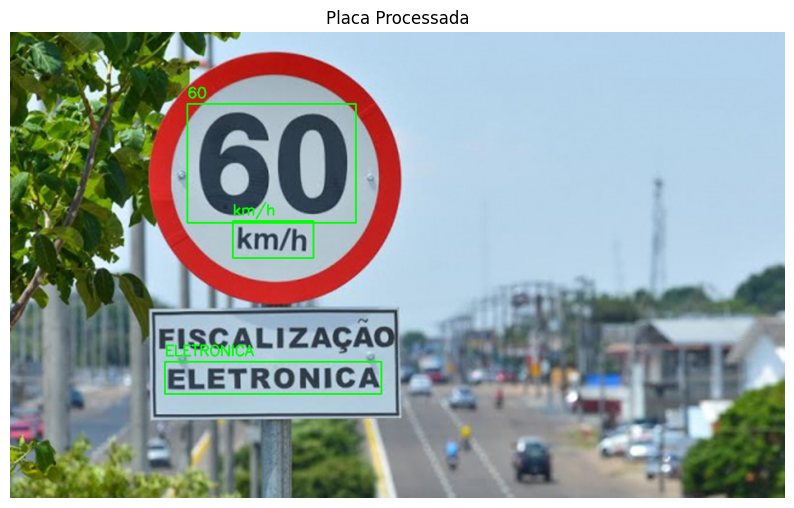

In [80]:
from google.colab import drive

drive.mount('/content/drive')

foto = '/content/drive/MyDrive/1 reavaliacao/VA/placas_de_transito/Img60.jpeg'

ler_placa(foto)